In [ ]:
import os
import glob
from typing import Final
from tqdm import tqdm

import torch

from source.data.mnist import get_mnist_test, get_fmnist_test

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import seaborn as sns
sns.set_theme()

In [2]:
RESULTS_PATH: Final[str] = os.path.abspath(os.path.join(".", "results_al"))

PLOT_PATH: Final[str] = os.path.abspath(os.path.join(".", "plots"))
os.makedirs(PLOT_PATH, exist_ok=True)

In [3]:
methods = ["mc_dropout", "ensemble"]
method_names = ["MC dropout", "Deep Ensemble"]

selection = 0
method = methods[selection]
method_name = method_names[selection]

seeds = [42, 142, 242, 342, 442]

acquisition_functions = ["tu_bc2_au_b", "tu_bc3", "au_c", "eu_b3", "eu_c2", "eu_c3", "random"]
acquisition_functions_names = ["TU (B/C2)\n/ AU (B)", "TU (B/C3)", "AU (C)", "EU (B3)", "EU (C2)", "EU (C3)", "Random"]
linestyles = ["-"] * len(acquisition_functions)
colors = ["C0", "C1", "C2", "C3", "C4", "C5", "black"]

datasets = ["mnist", "fmnist"]
dataset = datasets[0]

In [4]:
preds_runs, dataset_sizes = list(), list()

for af in acquisition_functions:
    preds_af = list()
    for seed in seeds:
        files = glob.glob(os.path.join(RESULTS_PATH, f"{dataset}_{method}_{af}_seed_{seed}_*"))
        files.sort()
        
        print(af, seed)
        
        # get number of iterations
        with open(os.path.join(files[-1], "args.txt"), "r") as f:
            for line in f:
                kv = [s.strip() for s in line.split(":")]
                if kv[0] == "n_iterations":
                    n_iterations = int(kv[1])

        preds_iters = list()
        for i in tqdm(range(n_iterations)):
            preds = torch.load(os.path.join(files[-1], f"preds_{i}.pt"), map_location=torch.device('cpu'))
            preds_iters.append(preds.cpu().to(torch.float16))
        preds_af.append(torch.stack(preds_iters, dim=0))
    preds_runs.append(torch.stack(preds_af, dim=0))
preds_runs = torch.stack(preds_runs, dim=1)

tu_bc2_au_b 42


  0%|          | 0/57 [00:00<?, ?it/s]

100%|██████████| 57/57 [00:01<00:00, 53.02it/s]


tu_bc2_au_b 142


100%|██████████| 57/57 [00:01<00:00, 53.24it/s]


tu_bc2_au_b 242


100%|██████████| 57/57 [00:01<00:00, 54.09it/s]


tu_bc2_au_b 342


100%|██████████| 57/57 [00:01<00:00, 53.19it/s]


tu_bc2_au_b 442


100%|██████████| 57/57 [00:01<00:00, 53.33it/s]


tu_bc3 42


100%|██████████| 57/57 [00:01<00:00, 53.29it/s]


tu_bc3 142


100%|██████████| 57/57 [00:01<00:00, 53.64it/s]


tu_bc3 242


100%|██████████| 57/57 [00:01<00:00, 54.19it/s]


tu_bc3 342


100%|██████████| 57/57 [00:01<00:00, 53.51it/s]


tu_bc3 442


100%|██████████| 57/57 [00:01<00:00, 53.34it/s]


au_c 42


100%|██████████| 57/57 [00:01<00:00, 53.69it/s]


au_c 142


100%|██████████| 57/57 [00:01<00:00, 52.81it/s]


au_c 242


100%|██████████| 57/57 [00:01<00:00, 52.79it/s]


au_c 342


100%|██████████| 57/57 [00:01<00:00, 54.16it/s]


au_c 442


100%|██████████| 57/57 [00:01<00:00, 54.10it/s]


eu_b3 42


100%|██████████| 57/57 [00:01<00:00, 54.18it/s]


eu_b3 142


100%|██████████| 57/57 [00:01<00:00, 53.25it/s]


eu_b3 242


100%|██████████| 57/57 [00:01<00:00, 53.20it/s]


eu_b3 342


100%|██████████| 57/57 [00:01<00:00, 53.15it/s]


eu_b3 442


100%|██████████| 57/57 [00:01<00:00, 53.07it/s]


eu_c2 42


100%|██████████| 57/57 [00:01<00:00, 53.17it/s]


eu_c2 142


100%|██████████| 57/57 [00:01<00:00, 52.30it/s]


eu_c2 242


100%|██████████| 57/57 [00:01<00:00, 53.24it/s]


eu_c2 342


100%|██████████| 57/57 [00:01<00:00, 53.11it/s]


eu_c2 442


100%|██████████| 57/57 [00:01<00:00, 52.99it/s]


eu_c3 42


100%|██████████| 57/57 [00:01<00:00, 53.51it/s]


eu_c3 142


100%|██████████| 57/57 [00:01<00:00, 53.12it/s]


eu_c3 242


100%|██████████| 57/57 [00:01<00:00, 53.17it/s]


eu_c3 342


100%|██████████| 57/57 [00:01<00:00, 53.28it/s]


eu_c3 442


100%|██████████| 57/57 [00:01<00:00, 52.59it/s]


random 42


100%|██████████| 57/57 [00:01<00:00, 52.46it/s]


random 142


100%|██████████| 57/57 [00:01<00:00, 52.43it/s]


random 242


100%|██████████| 57/57 [00:01<00:00, 52.67it/s]


random 342


100%|██████████| 57/57 [00:01<00:00, 52.45it/s]


random 442


100%|██████████| 57/57 [00:01<00:00, 53.20it/s]


In [5]:
print(preds_runs.shape)
# [seed, af, iter, n_test, preds, n_samples]

torch.Size([5, 7, 57, 10000, 50, 10])


In [6]:
# select first model (no dropout active)
if method == "mc_dropout":
    preds_runs = preds_runs[..., 0, :]
# average over models
else:
    preds_runs = torch.mean(preds_runs, axis=-2)

In [7]:
y_hat_runs = torch.argmax(preds_runs, axis=-1)
print(y_hat_runs.shape)

torch.Size([5, 7, 57, 10000])


In [8]:
if dataset == "mnist":
    _, y_test_t = get_mnist_test()
elif dataset == "fmnist":
    _, y_test_t = get_fmnist_test()

print(y_test_t.shape)

torch.Size([10000])


In [9]:
corrects = (y_hat_runs == y_test_t).to(dtype=torch.float)
print(corrects.shape)
accs = torch.mean(corrects, dim=-1)
print(accs.shape)

torch.Size([5, 7, 57, 10000])
torch.Size([5, 7, 57])


/tmp/ipykernel_3289787/1040124116.py:71: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


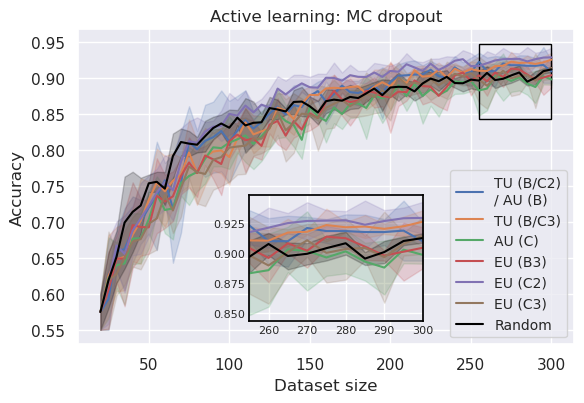

In [11]:
plt.figure(figsize=(6, 4.2))
div = 6

ax = plt.gca()

# get number of iterations
with open(os.path.join(files[-1], "args.txt"), "r") as f:
    for line in f:
        kv = [s.strip() for s in line.split(":")]
        if kv[0] == "n_iterations":
            n_iterations = int(kv[1])
        if kv[0] == "n_samples_per_iteration":
            n_samples_per_iteration = int(kv[1])
        if kv[0] == "start_samples_per_class":
            start_samples_per_class = int(kv[1])

x = [start_samples_per_class * 10 + n_samples_per_iteration * i for i in range(n_iterations)]

for a, af in enumerate(acquisition_functions):
    
    # mean + std
    mean, std = torch.mean(accs[:, a, :], dim=0), torch.std(accs[:, a, :], dim=0)
    plt.plot(x, mean, label=acquisition_functions_names[a], linestyle=linestyles[a], color=colors[a])
    plt.fill_between(x, mean + std, mean - std, color=colors[a], alpha=0.2)
    """
    # quartiles
    first = torch.quantile(accs[:, a, :], torch.tensor(0.25), dim=0)
    second = torch.quantile(accs[:, a, :], torch.tensor(0.5), dim=0)
    third = torch.quantile(accs[:, a, :], torch.tensor(0.75), dim=0)
    plt.plot(x, second, label=af)
    plt.fill_between(x, third, first, alpha=0.2)
    """
plt.legend(fontsize=10, loc="lower right")
# plt.ylim(bottom=0.55, top=0.97 if dataset == "mnist" else 0.82)
plt.ylabel("Accuracy")
plt.xlabel("Dataset size")
plt.title(f"Active learning: {method_name}")

# inset axis, location at custom position
inset_ax = inset_axes(ax, width="35%", height="40%",
                      bbox_to_anchor=(0.33, 0.05, 1., 1.),
                    #   bbox_to_anchor=(0.07, 0.55, 1., 1.),
                      bbox_transform=ax.transAxes,
                      loc='lower left')

x = [start_samples_per_class * 10 + n_samples_per_iteration * i for i in range(n_iterations)][-len(x)//div:]
for a, af in enumerate(acquisition_functions):
    # mean + std
    mean, std = torch.mean(accs[:, a, -accs.shape[-1]//div:], dim=0), torch.std(accs[:, a, -accs.shape[-1]//div:], dim=0)
    plt.plot(x, mean, label=acquisition_functions_names[a], linestyle=linestyles[a], color=colors[a])
    plt.fill_between(x, mean + std, mean - std, color=colors[a], alpha=0.2)
# inset_ax.set_yticks([])
inset_ax.tick_params(axis='y', which='both', labelsize=8, pad=-3)
inset_ax.tick_params(axis='x', which='both', labelsize=8, pad=-3)
# inset_ax.set_ylim(ymin, ymax)
inset_ax.set_xlim(x[0], x[-1])
# black border
inset_ax.spines['bottom'].set_color('black')
inset_ax.spines['top'].set_color('black')
inset_ax.spines['right'].set_color('black')
inset_ax.spines['left'].set_color('black')

# # # draw rectangle around inset in main plot
rect = plt.Rectangle((x[0], inset_ax.get_ylim()[0]), 
                     x[-1] - x[0], 
                     inset_ax.get_ylim()[1] - inset_ax.get_ylim()[0], 
                     linewidth=1, edgecolor='black', facecolor='none')
# ax.add_patch(rect)
ax.add_patch(rect)

plt.tight_layout()
plt.savefig(os.path.join(PLOT_PATH, f"al_{dataset}_{method}.pdf"))
plt.show()